In [328]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# # Load the image in grayscale
# image = cv2.imread('NGP_PRE2.png', cv2.IMREAD_GRAYSCALE)

# # Define a threshold value
# threshold = 84

# # Placeholder functions for processing
# def process1(x, y, value):
#     print(f"Process1 at ({x},{y}) with value {value}")

# def process2(x, y, value):
#     print(f"Process2 at ({x},{y}) with value {value}")
# # Plot original and processed images
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title("Original Grayscale Image")
# plt.imshow(image, cmap='gray')
# plt.axis('off')

# # Iterate through each pixel
# height, width = image.shape
# for y in range(height):
#     for x in range(width):
#         pixel_value = image[y, x]
#         if pixel_value < threshold:
#             image[y, x] = 0
#         else:
#             image[y, x] = 1


# plt.subplot(1, 2, 2)
# plt.title("Processed Image")
# plt.imshow(image, cmap='gray')
# plt.axis('off')

# plt.tight_layout()
# plt.show()
# cv2.imwrite("pre2.png", image)

In [329]:
# import cv2
# import numpy as np
# from scipy import ndimage

# image = cv2.imread('N1-1.png')
# # Step 2: Convert to grayscale and threshold
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# # Step 3: Noise removal and sure background
# kernel = np.ones((3, 3), np.uint8)
# opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
# sure_bg = cv2.dilate(opening, kernel, iterations=3)

# # Step 4: Sure foreground using distance transform
# dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
# sure_fg = np.uint8(sure_fg)

# # Step 5: Unknown region (background - foreground)
# unknown = cv2.subtract(sure_bg, sure_fg)

# # Step 6: Marker labeling
# _, markers = cv2.connectedComponents(sure_fg)

# # Increment labels to ensure background is not 0
# markers = markers + 1

# # Mark unknown regions with 0
# markers[unknown == 255] = 0

# # Step 7: Apply watershed
# image_color = image.copy()
# markers = cv2.watershed(image_color, markers)

# # Step 8: Visualize with colored regions
# label_hue = np.uint8(179 * markers / np.max(markers))
# blank_ch = 255 * np.ones_like(label_hue)
# colored_markers = cv2.merge([label_hue, blank_ch, blank_ch])
# colored_markers = cv2.cvtColor(colored_markers, cv2.COLOR_HSV2BGR)
# colored_markers[markers == -1] = [0, 0, 255]  # Red boundary

# # Show or save
# cv2.imwrite("result_watershed.png", colored_markers)

# # Optional: Show using matplotlib
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.title('Original')
# plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
# plt.subplot(1, 2, 2)
# plt.title('Watershed Result')
# plt.imshow(cv2.cvtColor(colored_markers, cv2.COLOR_BGR2RGB))
# plt.tight_layout()
# plt.show()

In [330]:
# import cv2
# import numpy as np

# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import ndimage
# image = cv2.imread('NGP_PRE2.png')
# # Step 2: Convert to grayscale and threshold
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Initialize saliency detector
# saliency = cv2.saliency.StaticSaliencySpectralResidual_create()

# # Compute saliency map
# (success, saliencyMap) = saliency.computeSaliency(image)

# # Convert to displayable image
# saliencyMap = (saliencyMap * 255).astype("uint8")

# # Display
# plt.imshow("Original", image)
# plt.imshow("Saliency Map", saliencyMap)

In [331]:
# import cv2
# import matplotlib.pyplot as plt

# # Load image and convert to grayscale
# image = cv2.imread('pre2.png')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Calculate histogram
# hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# # Plot histogram
# plt.figure(figsize=(8, 4))
# plt.title("Grayscale Histogram")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")
# plt.plot(hist, color='black')
# plt.xlim([0, 256])
# plt.grid(True)
# plt.show()


In [332]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path_or = "/home/eric/Documents/cervicalResearchIIP/img_1006t/original/N1-10.png"





In [333]:
def plot_two(img1, img2):
    # Create a 1x2 subplot (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figsize as needed

    # Plot the first image
    axes[0].imshow(img1, cmap='gray')
    axes[0].set_title('Image 1')
    axes[0].axis('off')

    # Plot the second image
    axes[1].imshow(img2, cmap='gray')
    axes[1].set_title('Image 2')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

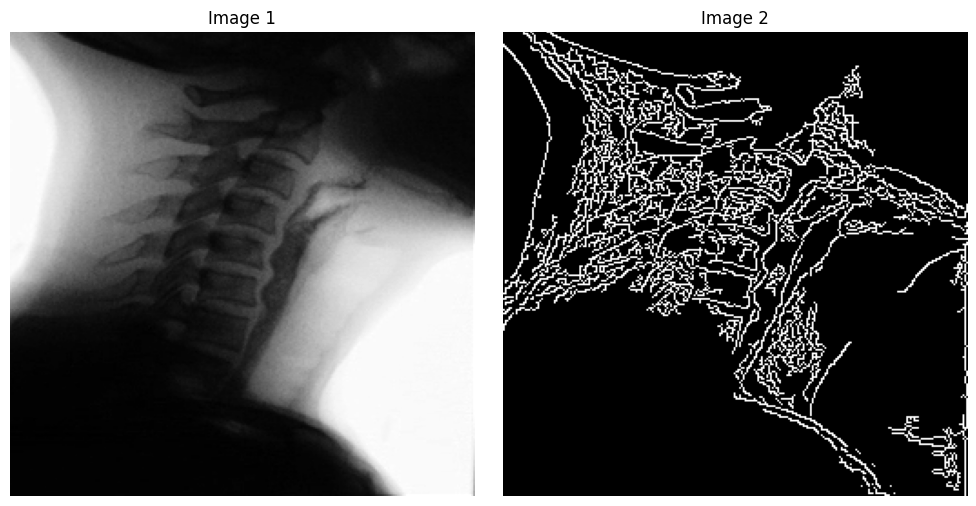

In [334]:
img_gry = cv2.imread(path_or, cv2.IMREAD_GRAYSCALE)

img_pro = cv2.Canny(img_gry, 0, 100, apertureSize=3, L2gradient=False)

plot_two(img_gry, img_pro)


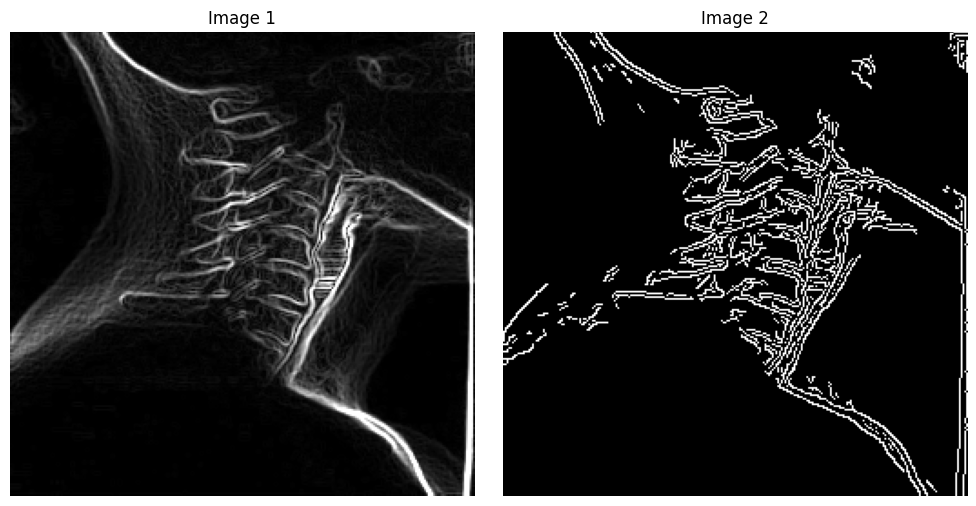

In [335]:
path_prewitt = "/home/eric/Documents/cervicalResearchIIP/img_1006t/feature/N4-6/PRE2.png"
img_pre = cv2.imread(path_prewitt, cv2.IMREAD_GRAYSCALE)


img_prepro = cv2.Canny(img_pre, 150, 250, apertureSize=3, L2gradient=False)

plot_two(img_pre, img_prepro)

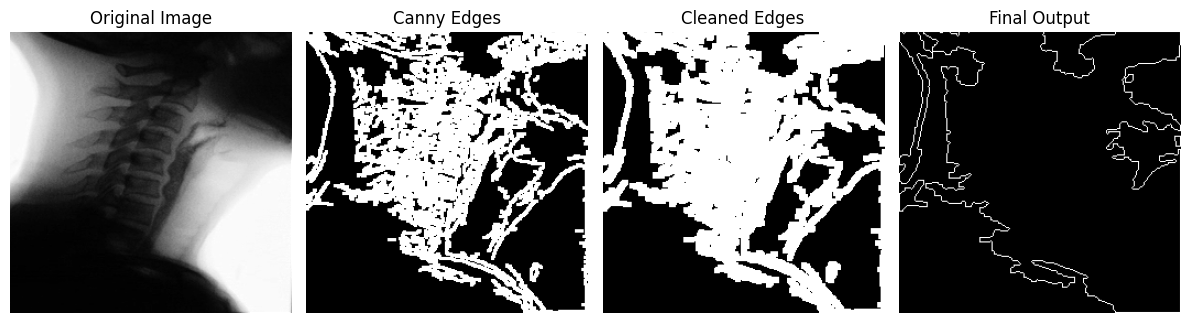

In [336]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert to grayscale
#gray = cv2.cvtColor(img_gry, cv2.COLOR_BGR2GRAY)
if img_gry.dtype != np.uint8:
    img_gry = (img_gry * 255).astype(np.uint8)
    
 # Step 0: Enhance contrast across image
clahe = cv2.createCLAHE(clipLimit=6, tileGridSize=(8, 8))
equalized = clahe.apply(img_gry)

# Step 1: Auto threshold for Canny
v = np.median(equalized)
lower = int(max(0, 0.66 * v))
upper = int(min(255, 1.33 * v))
edges = cv2.Canny(equalized, lower, upper)




# Step 2: Apply Canny Edge Detector with tuned thresholds
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)   

# Step 3: Morphological Opening (removes small noise)
kernel = np.ones((3, 3), np.uint8)
# Step 3: Optional - Try closing instead of opening
edges_clean = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Step 4: Dilate
edges_thick = cv2.dilate(edges_clean, kernel, iterations=1)


# Step 5: Optional – Filter contours by length to keep only meaningful outlines
contours, _ = cv2.findContours(edges_thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = np.zeros_like(edges_thick)

min_contour_length = 1  # You can adjust this threshold

for cnt in contours:
    if cv2.arcLength(cnt, closed=True) > min_contour_length:
        cv2.drawContours(output, [cnt], -1, 255, thickness=1)

# Display results
titles = ['Original Image', 'Canny Edges', 'Cleaned Edges', 'Final Output']
images = [img_gry, edges, edges_thick, output]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [337]:
print("Non-zero in edges:", np.count_nonzero(edges))
print("Non-zero in edges_thick:", np.count_nonzero(edges_thick))
print("Non-zero in output:", np.count_nonzero(output))


Non-zero in edges: 26538
Non-zero in edges_thick: 33632
Non-zero in output: 2291


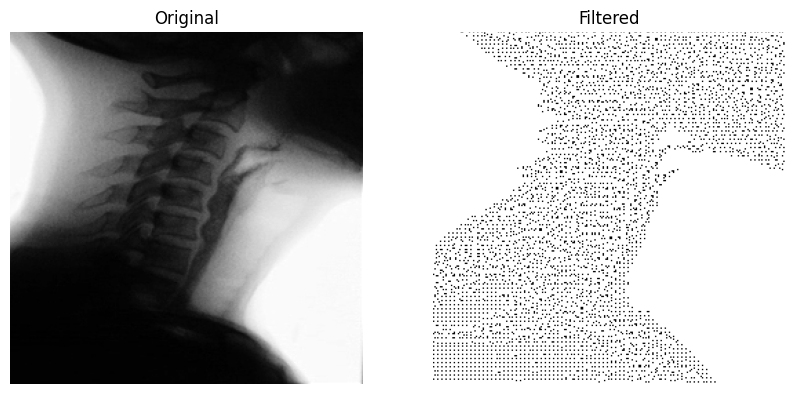

In [338]:
# Load grayscale image
img = img_gry
h, w = img.shape

# Calculate padding to make divisible by 3
pad_h = (3 - h % 3) % 3
pad_w = (3 - w % 3) % 3

# Pad image (black border)
img_padded = cv2.copyMakeBorder(img, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=0)
h_new, w_new = img_padded.shape

# Prepare output
out = np.zeros_like(img_padded)

# Process 3x3 non-overlapping patches
for i in range(0, h_new, 3):
    for j in range(0, w_new, 3):
        patch = img_padded[i:i+3, j:j+3].astype(np.int32)

        # Find min pixel index
        min_idx = np.unravel_index(np.argmin(patch), patch.shape)
        min_val = patch[min_idx]
        
    
        if min_val < 100:
            # Sum of other 8 pixels
            total_sum = patch.sum() - min_val

            # Compute new value for min pixel
            new_min = max(0, min_val - total_sum)

            # Set new patch: all 255, except min pixel
            new_patch = np.full((3, 3), 255, dtype=np.uint8)
            new_patch[min_idx] = new_min

            out[i:i+3, j:j+3] = new_patch
        else:
            out[i:i+3, j:j+3] = 255
            
# Crop back to original size
out_cropped = out[:h, :w]

# Plot original and processed side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Filtered")
plt.imshow(out_cropped, cmap="gray")
plt.axis("off")

plt.show()

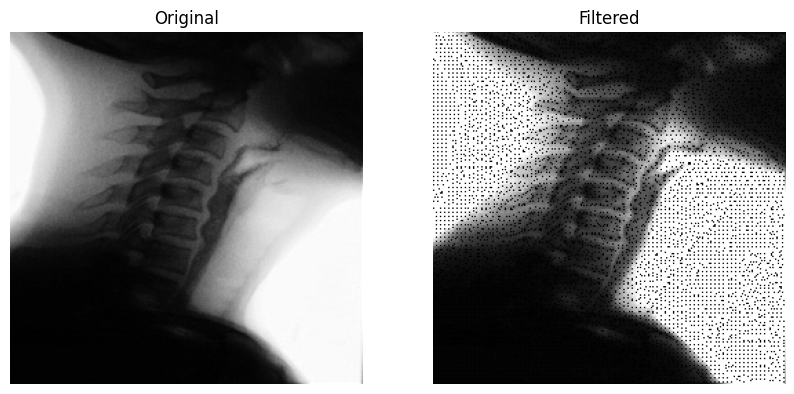

In [339]:

# Calculate padding to make divisible by 3
pad_h = (3 - h % 3) % 3
pad_w = (3 - w % 3) % 3

# Pad image (black border)
img_padded = cv2.copyMakeBorder(img, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=0)
h_new, w_new = img_padded.shape

# Prepare output
out = np.zeros_like(img_padded)

# Process 3x3 non-overlapping patches
for i in range(0, h_new, 3):
    for j in range(0, w_new, 3):
        patch = img_padded[i:i+3, j:j+3].astype(np.int32)

        # Find min pixel index
        min_idx = np.unravel_index(np.argmin(patch), patch.shape)
        min_val = patch[min_idx]

        # Sum of other 8 pixels
        total_sum = patch.sum() - min_val

        # Compute new value for min pixel
        new_min = max(0, min_val - total_sum)

        # Copy patch into result
        new_patch = patch.copy()

        # Update non-min pixels = original + min_val
        for x in range(3):
            for y in range(3):
                if (x, y) != min_idx:
                    new_patch[x, y] = min(patch[x, y] + min_val, 255)

        # Update min pixel separately
        new_patch[min_idx] = new_min

        out[i:i+3, j:j+3] = new_patch.astype(np.uint8)

# Crop back to original size
out_cropped = out[:h, :w]

# Plot original and processed side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Filtered")
plt.imshow(out_cropped, cmap="gray")
plt.axis("off")

plt.show()


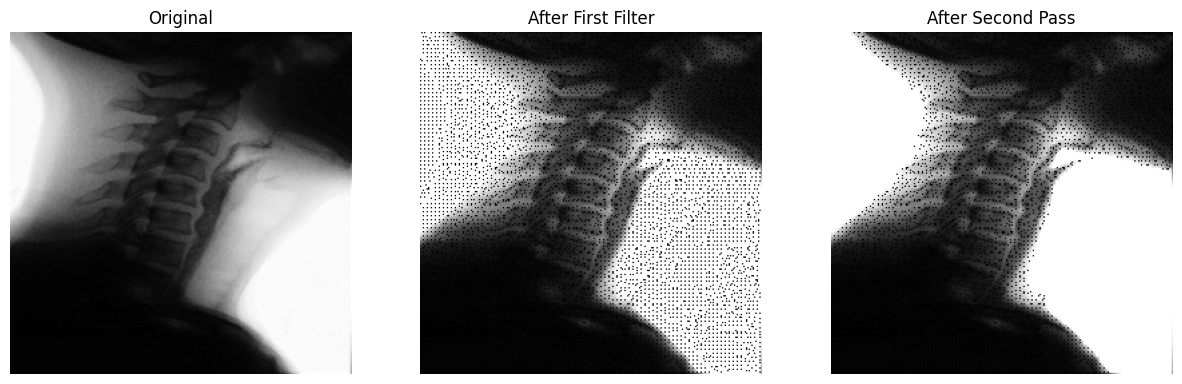

In [340]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assume out_cropped is already produced from the first filtering step
# (Code from the previous step goes here, then continue...)

# Second pass output
out2 = out_cropped.copy()

h2, w2 = out2.shape

# Process again in 3x3 non-overlapping patches
for i in range(0, h2 - h2 % 3, 3):
    for j in range(0, w2 - w2 % 3, 3):
        patch = out2[i:i+3, j:j+3]

        # Count pixels < 255
        num_dark = np.sum(patch < 255)

        if num_dark == 1:
            # If only one dark pixel, turn entire patch white
            out2[i:i+3, j:j+3] = 255

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("After First Filter")
plt.imshow(out_cropped, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("After Second Pass")
plt.imshow(out2, cmap="gray")
plt.axis("off")

plt.show()

90.44450378417969
108.32276916503906


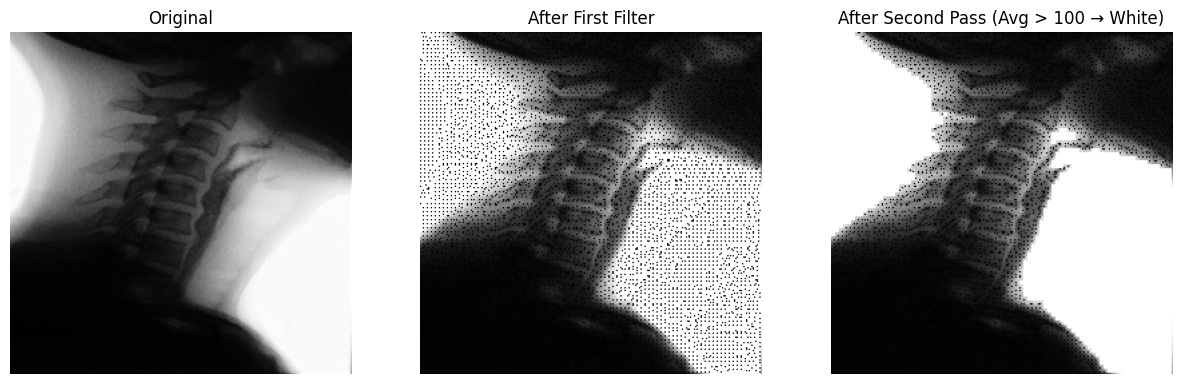

In [341]:
out2 = out_cropped.copy()
h2, w2 = out2.shape
print(np.mean(img_gry))
print(np.mean(out2))

avg_gry = np.mean(img_gry)

# Process again in 3x3 non-overlapping patches
for i in range(0, h2 - h2 % 3, 3):
    for j in range(0, w2 - w2 % 3, 3):
        patch = out2[i:i+3, j:j+3]

        # Compute average of the 9 pixels
        avg_val = np.mean(patch)

        # If average > 100, make entire block white
        if avg_val > avg_gry*2.12:
            out2[i:i+3, j:j+3] = 255

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("After First Filter")
plt.imshow(out_cropped, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("After Second Pass (Avg > 100 → White)")
plt.imshow(out2, cmap="gray")
plt.axis("off")

plt.show()


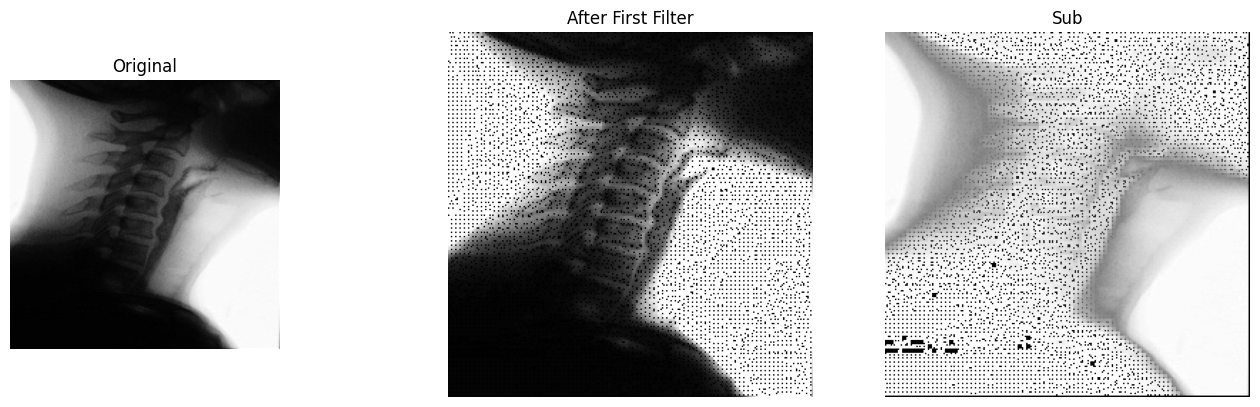

In [342]:
sub = img_gry - out_cropped

# Plot results
plt.figure(figsize=(16, 5))

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("After First Filter")
plt.imshow(out_cropped, cmap="gray")
plt.axis("off")

# plt.subplot(1, 3, 3)
# plt.title("After Second Pass (Avg > 100 → White)")
# plt.imshow(out2, cmap="gray")
# plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sub")
plt.imshow(sub, cmap="gray")
plt.axis("off")

plt.show()

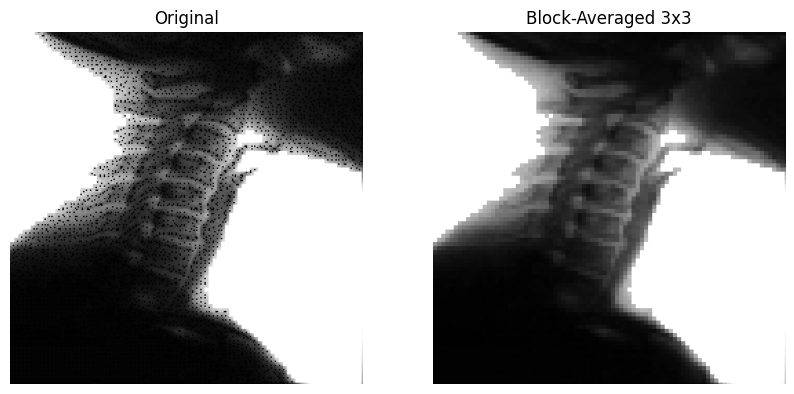

In [343]:
img = out2
h, w = img.shape

# Pad image to make divisible by 3
pad_h = (3 - h % 3) % 3
pad_w = (3 - w % 3) % 3
img_padded = cv2.copyMakeBorder(img, 0, pad_h, 0, pad_w, cv2.BORDER_REFLECT)
h_new, w_new = img_padded.shape

# Prepare output
out_avg = np.zeros_like(img_padded)

# Apply 3x3 block average filter
for i in range(0, h_new, 3):
    for j in range(0, w_new, 3):
        block = img_padded[i:i+3, j:j+3].astype(np.float32)
        avg_val = np.mean(block)
        out_avg[i:i+3, j:j+3] = int(avg_val)

# Crop back to original size
out_avg_cropped = out_avg[:h, :w]

# Plot original and block-averaged image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Block-Averaged 3x3")
plt.imshow(out_avg_cropped, cmap="gray")
plt.axis("off")

plt.show()

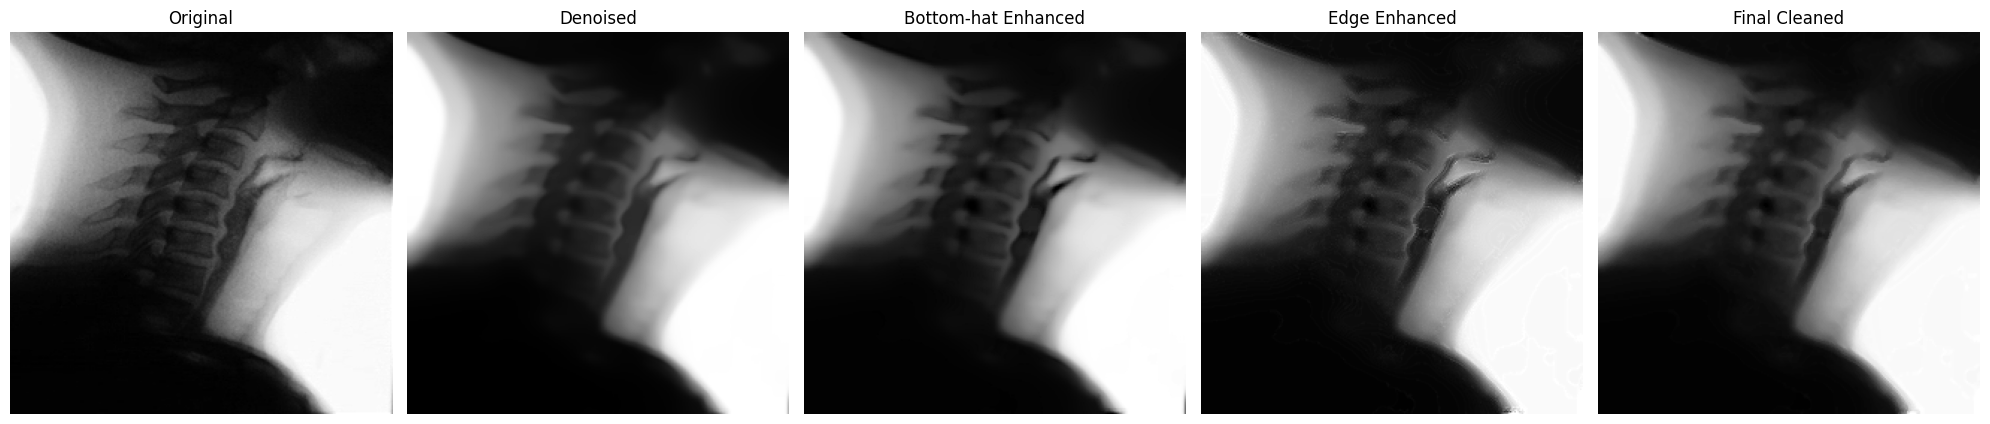

In [344]:
import cv2
import numpy as np

# Load grayscale image
img = img_gry

denoised = cv2.fastNlMeansDenoising(img, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Step 2: Bottom-hat morphology to suppress background
kernel_size = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
bottom_hat = cv2.morphologyEx(denoised, cv2.MORPH_BLACKHAT, kernel)
enhanced = cv2.subtract(denoised, bottom_hat)

# Step 3: Edge enhancement using Laplacian
laplacian = cv2.Laplacian(enhanced, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
alpha = 1.5
edge_enhanced = cv2.addWeighted(enhanced, 1, laplacian, alpha, 0)

# Step 4: Remove small black-dot noise
cleaned = cv2.medianBlur(edge_enhanced, 3)

# Display using matplotlib
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(denoised, cmap='gray')
axes[1].set_title('Denoised')
axes[2].imshow(enhanced, cmap='gray')
axes[2].set_title('Bottom-hat Enhanced')
axes[3].imshow(edge_enhanced, cmap='gray')
axes[3].set_title('Edge Enhanced')
axes[4].imshow(cleaned, cmap='gray')
axes[4].set_title('Final Cleaned')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

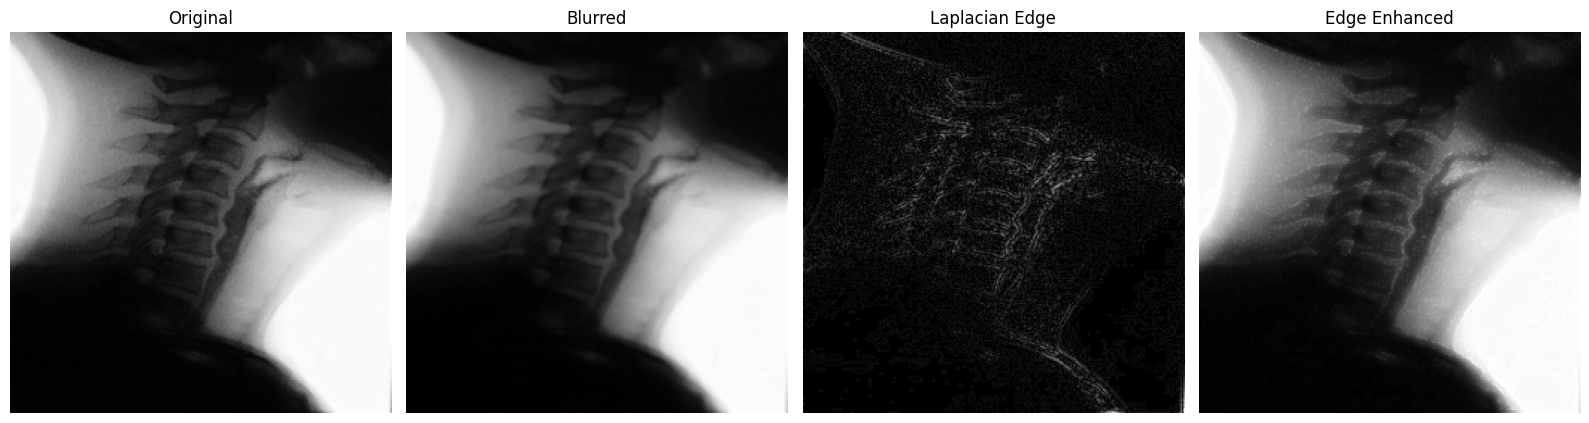

In [345]:
blurred = cv2.GaussianBlur(img, (3, 3), 0)

# Step 2: Edge detection using Laplacian
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# Step 3: Combine edges with original image
alpha = 1.5  # strength of edge enhancement
edge_enhanced = cv2.addWeighted(img, 1, laplacian_abs, alpha, 0)

# Display with matplotlib
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Blurred')
axes[2].imshow(laplacian_abs, cmap='gray')
axes[2].set_title('Laplacian Edge')
axes[3].imshow(edge_enhanced, cmap='gray')
axes[3].set_title('Edge Enhanced')
for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

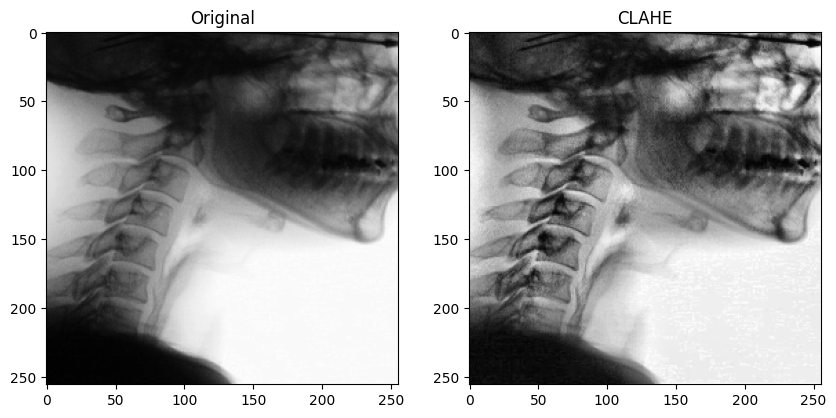

In [371]:
path_gry = "/home/eric/Documents/cervicalResearchIIP/img_1006t/original/N1-1.png"

# Load grayscale image
img = cv2.imread(path_gry, cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title("CLAHE")
plt.imshow(cl1, cmap='gray')
plt.show()